In [1]:
import utilsExperimentos
import numpy as np
import matplotlib.pyplot as plt

In [18]:
instanciasMin = 100
instanciasMax = 20000
instanciasCantidades = 20
cantidadExperimentos = 1000

m1AccPositive=0.5
m1AccNegative=0.5
m2AccPositive=0.5
m2AccNegative=0.5
tipoFusionador='or'
correlacionPositive=0.95
correlacionNegative=-0.95


resultadosEstimaciones = utilsExperimentos.correrEstimaciones(cantidadElementosTestMin=instanciasMin, cantidadElementosTestMax=instanciasMax, cantidadElementosTestCantidad=instanciasCantidades)
resultadosTest = utilsExperimentos.correrExperimentos(cantidadExperimentos=cantidadExperimentos, cantidadElementosTestMin=instanciasMin, cantidadElementosTestMax=instanciasMax, cantidadElementosTestCantidad=instanciasCantidades, correlacionPositive=correlacionPositive, correlacionNegative=correlacionNegative)

[>                              ] 0/1000 (0.0%)

c:\Users\gianf\OneDrive\Escritorio\XDD\TESIS\experimentos\fusionador.py:13: RuntimeWarning: invalid value encountered in scalar divide
  return  [0, probabilidadesNegative[1]/(probabilidadesNegative[1]+probabilidadesNegative[3]), probabilidadesPositive[0]/(probabilidadesPositive[0]+probabilidadesPositive[2]), 1]


[==============================>] 1000/1000 (100.0%)


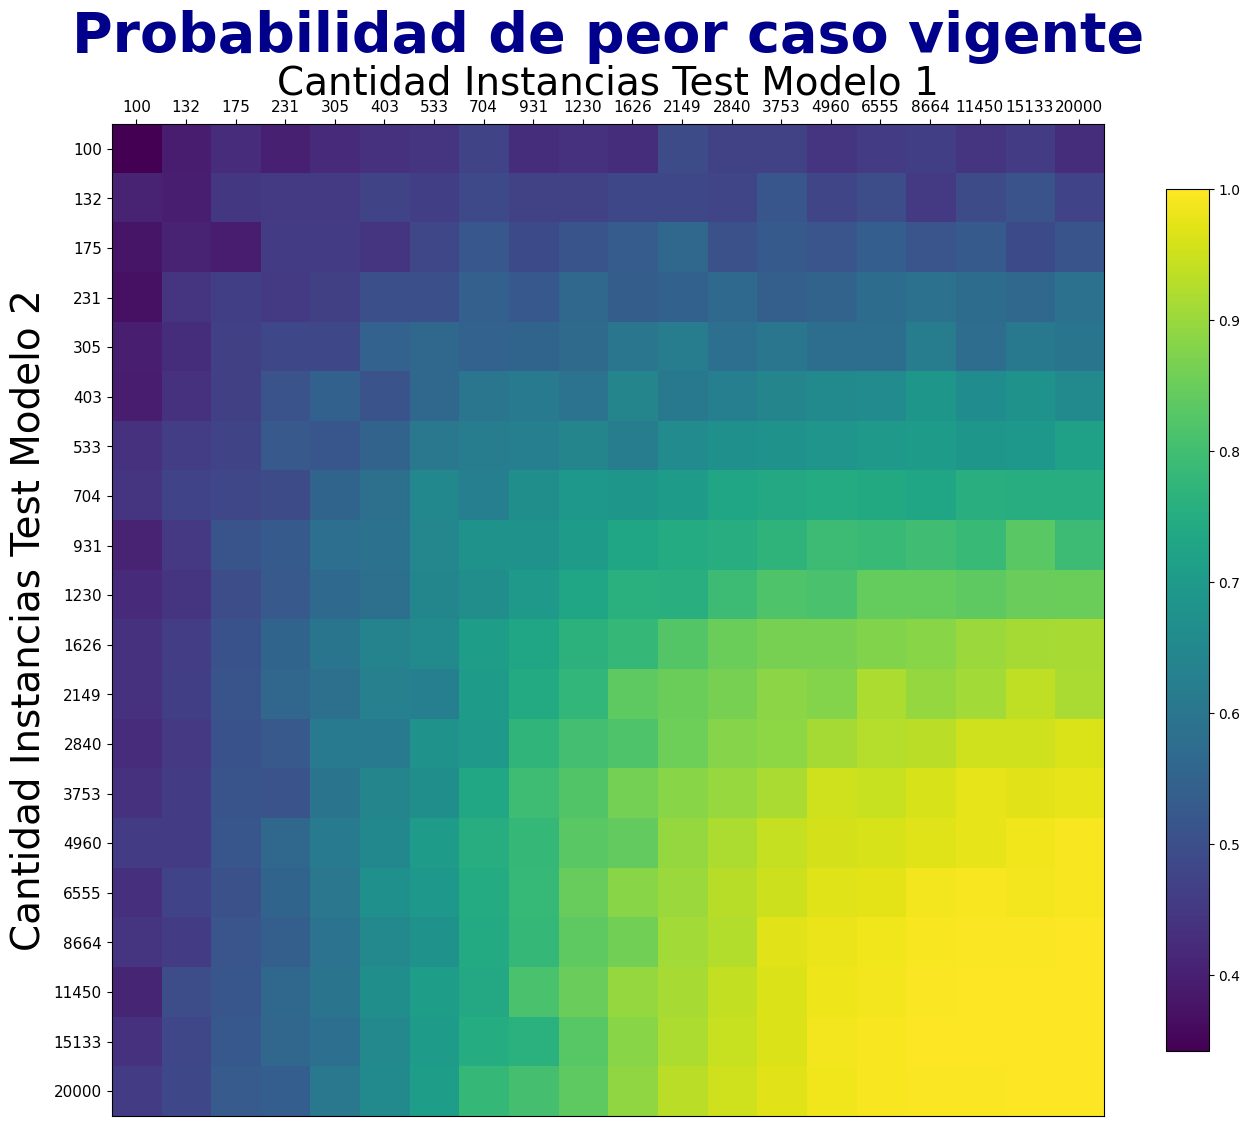

In [ ]:
# probabilidad de peor caso peor que el resultado
probabilidadesPeorCasoFallido = (resultadosTest[:,:,0,:] > resultadosTest[:,:,1,:]).mean(2)

fig, ax = plt.subplots(figsize=(instanciasCantidades*8//10,instanciasCantidades*8//10))

im = ax.imshow(probabilidadesPeorCasoFallido, cmap='viridis')

ax.set_xticks(list(range(instanciasCantidades)), np.logspace(np.log10(instanciasMin), np.log10(instanciasMax), instanciasCantidades).round().astype(int), fontsize=11)
ax.set_yticks(list(range(instanciasCantidades)), np.logspace(np.log10(instanciasMin), np.log10(instanciasMax), instanciasCantidades).round().astype(int), fontsize=11)

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xlabel("Cantidad Instancias Test Modelo 1", fontsize=instanciasCantidades*14//10)
ax.set_ylabel("Cantidad Instancias Test Modelo 2", fontsize=instanciasCantidades*14//10)
ax.tick_params(bottom=False, labelbottom=False)

for i in range(probabilidadesPeorCasoFallido.shape[0]):
    for j in range(probabilidadesPeorCasoFallido.shape[1]):
        text = ax.text(j, i, f'{probabilidadesPeorCasoFallido[i, j]:.2f}', ha='center', va='center', color='red', fontsize=12)

plt.colorbar(im, ax=ax, shrink=0.7)
plt.title('Probabilidad de peor caso vigente', fontsize=instanciasCantidades*20//10, color='darkblue', fontweight='bold')
plt.show()
